<div>
    <img src="https://media.datakeen.co/wp-content/uploads/2022/11/28141154/Datakeen-Classification-texte.png" alt="Nobel Prize" width="250" align="left" hspace="10">
    <h1>Digikala Comments Classification</h1>
</div>

Objective: Develop a model to classify Digikala user comments by intent (e.g., product quality, pricin).

Approach: Use machine learning for multi-class classification, focusing on precision.

## Import necessary libraries

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

## Read Data

In [4]:
df = pd.read_csv("data_train.csv")

## Overview of Data

In [5]:
df.head()

,id,comment,intent
0,14311999,خوب وخوش طعم بود,"1,5"
1,14312094,واقعا دست مریزاد هراز جان هم زده پروبیوتیک و خ...,"1,5"
2,14312102,هنوز استفاده نکردم ولی عطر خوبی داره بسته بندی...,"1,5"
3,14312205,ماندگاری خیلی خوبی داره اما بوی خوشایندی نداره,"1,5"
4,14312224,من خیلی وقته از رول ضد تعریق شون استفاده میکنم...,"1,5"


In [6]:
df.tail()

,id,comment,intent
89995,15336944,بسیار زیبا و خوش دوخت بود\nمن سایزم ۴۰ هست که ...,1
89996,15336946,کیفیت مناسب,1
89997,15336949,خوب و معمولی است.,1
89998,15336950,بد نیست,1
89999,15336955,نسبتا خوب,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       90000 non-null  int64 
 1   comment  90000 non-null  object
 2   intent   90000 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.1+ MB


In [8]:
df.isna().sum()

id         0
comment    0
intent     0
dtype: int64

In [9]:
df.duplicated().sum()

1

## Handle Missing Values & Duplicates

In [10]:
df[df.duplicated()]

,id,comment,intent
49189,14000000,بوی خوب و غلظت مناسب,5


In [11]:
df[df["id"] == 14000000]

,id,comment,intent
44545,14000000,بوی خوب و غلظت مناسب,5
49189,14000000,بوی خوب و غلظت مناسب,5


In [12]:
df = df.drop_duplicates().reset_index(drop=True)

## EDA

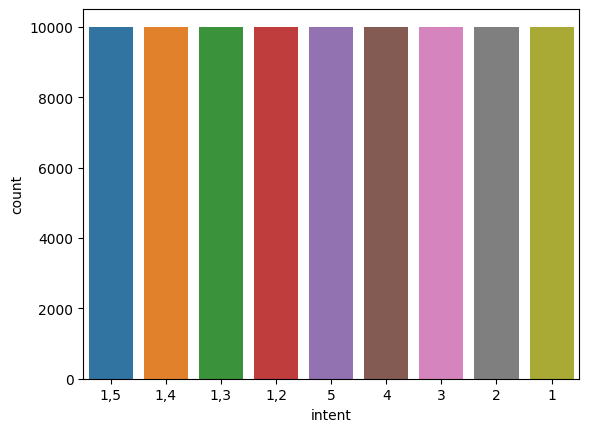

In [13]:
sns.countplot(df["intent"]);

In [14]:
df["intent"].value_counts()

1,5    10000
1,4    10000
1,3    10000
1,2    10000
4      10000
3      10000
2      10000
1      10000
5       9999
Name: intent, dtype: int64

In [15]:
df

,id,comment,intent
0,14311999,خوب وخوش طعم بود,"1,5"
1,14312094,واقعا دست مریزاد هراز جان هم زده پروبیوتیک و خ...,"1,5"
2,14312102,هنوز استفاده نکردم ولی عطر خوبی داره بسته بندی...,"1,5"
3,14312205,ماندگاری خیلی خوبی داره اما بوی خوشایندی نداره,"1,5"
4,14312224,من خیلی وقته از رول ضد تعریق شون استفاده میکنم...,"1,5"
...,...,...,...
89994,15336944,بسیار زیبا و خوش دوخت بود\nمن سایزم ۴۰ هست که ...,1
89995,15336946,کیفیت مناسب,1
89996,15336949,خوب و معمولی است.,1
89997,15336950,بد نیست,1


## Text Preprocessing

In [20]:
from hazm import Normalizer, Lemmatizer, Stemmer, word_tokenize
import re

In [24]:

normalizer = Normalizer()
lemmatizer = Lemmatizer()
stemmer = Stemmer()
# turn a doc into clean tokens
def clean_data(doc):
    doc = normalizer.normalize(doc) # Normalize document using Hazm Normalizer
    tokenized = word_tokenize(doc)  # Tokenize text
    # ['یه', 'ساله', 'خریدم', 'خیلی', 'ضعیف', 'است', 'بازی', 'هم', 'که', 'چی', 'بگم', 'هیچ', 'کدوم', 'رو', 'باز', 'نمیکنه']
    tokens = []
    for token in tokenized:
      token = re.sub("[،:.,;()/+]", " ", token) 
      token = re.sub(r"\!+","!", token)
      token = re.sub(r"\؟+","؟", token)
      token = re.sub(r"\u200c", " ", token)
      tokens.append(token)

    tokens = [w for w in tokens if not len(w) <= 1] # single character removal 
    tokens = [w for w in tokens if not w.isdigit()] # digit remove
    tokens = [lemmatizer.lemmatize(w) for w in tokens] # Lemmatize sentence words using Hazm Lemmatizer
    # tokens = [stemmer.stem(w) for w in tokens] 
    tokens = ' '.join(tokens)
    return tokens

In [25]:
df["clean_comment"] = df["comment"].apply(clean_data)

In [26]:
df

,id,comment,intent,clean_comment
0,14311999,خوب وخوش طعم بود,"1,5",خوب وخوش طعم بود#است
1,14312094,واقعا دست مریزاد هراز جان هم زده پروبیوتیک و خ...,"1,5",واقعا دست مریزاد هراز جان هم زده پروبیوتیک خوش...
2,14312102,هنوز استفاده نکردم ولی عطر خوبی داره بسته بندی...,"1,5",هنوز استفاده کرد#کن ولی عطر خوبی داره بسته بست...
3,14312205,ماندگاری خیلی خوبی داره اما بوی خوشایندی نداره,"1,5",ماندگاری خیلی خوبی داره اما بوی خوشایند نداره
4,14312224,من خیلی وقته از رول ضد تعریق شون استفاده میکنم...,"1,5",من خیلی وقته از رول ضد تعریق شون استفاده می کن...
...,...,...,...,...
89994,15336944,بسیار زیبا و خوش دوخت بود\nمن سایزم ۴۰ هست که ...,1,بسیار زیبا خوش دوخت بود#است من سایز هست که لار...
89995,15336946,کیفیت مناسب,1,کیفیت مناسب
89996,15336949,خوب و معمولی است.,1,خوب معمولی است
89997,15336950,بد نیست,1,بد نیست


In [28]:
from sklearn.model_selection import train_test_split

X = df['clean_comment']
y = df.intent

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=212)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(62999,) (27000,) (62999,) (27000,)


In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report,f1_score

lin_svc_ds = Pipeline([('tfidf', TfidfVectorizer()),
                      ('lin_svc', LinearSVC())])

lin_svc_ds.fit(X_train, y_train)

pred = lin_svc_ds.predict(X_test)

print("MODEL: LINEAR SVC")
print("accuarcy score: ", accuracy_score(y_test, pred))
print("Confusion matrix: ", confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

MODEL: LINEAR SVC
accuarcy score:  0.7290740740740741
Confusion matrix:  [[2265  140  140  126   92  102   54   74   28]
 [ 236 1817   72   68   48  693   21    9    7]
 [ 177   72 1857  134   38   10  559   25    2]
 [ 164   45  159 1972   31   11   59  557    6]
 [  79   19   17   28 2089    6    6    8  809]
 [  91  313    9   13    5 2447   26   21    3]
 [  74   12  349   27    3   19 2399  122    7]
 [  85   11   23  420    9   23  150 2359   22]
 [  40    3    1    9  462    9    8   15 2480]]
              precision    recall  f1-score   support

           1       0.71      0.75      0.73      3021
         1,2       0.75      0.61      0.67      2971
         1,3       0.71      0.65      0.68      2874
         1,4       0.71      0.66      0.68      3004
         1,5       0.75      0.68      0.72      3061
           2       0.74      0.84      0.78      2928
           3       0.73      0.80      0.76      3012
           4       0.74      0.76      0.75      3102
       

In [62]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression


# Fit the pipeline to the data
log_reg_ds = Pipeline([('count_vec', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('log_reg', LogisticRegression())])

log_reg_ds.fit(X_train, y_train)

# predict on test dataset
pred = log_reg_ds.predict(X_test)

print("MODEL: LOGISTIC REGRESSION")

# print accuracy score
print("accuarcy score: ", accuracy_score(y_test, pred))

#print confusion matrix
print("Confusion matrix: ", confusion_matrix(y_test, pred))
#print classification report
print(classification_report(y_test, pred))

MODEL: LOGISTIC REGRESSION
accuarcy score:  0.7521481481481481
Confusion matrix:  [[2382  121  128  122   45   79   43   87   14]
 [ 258 2049   41   45   18  540    9    8    3]
 [ 189   38 2004  105   11    8  485   34    0]
 [ 164   31  113 2066    7    8   54  559    2]
 [ 109   16   11   23 2222    4    5   15  656]
 [  85  429    1    8    3 2379   13   10    0]
 [  78    6  399   18    0   20 2369  116    6]
 [  78    6   13  403    2   15  137 2435   13]
 [  57    8    2    4  509   14   11   20 2402]]
              precision    recall  f1-score   support

           1       0.70      0.79      0.74      3021
         1,2       0.76      0.69      0.72      2971
         1,3       0.74      0.70      0.72      2874
         1,4       0.74      0.69      0.71      3004
         1,5       0.79      0.73      0.76      3061
           2       0.78      0.81      0.79      2928
           3       0.76      0.79      0.77      3012
           4       0.74      0.78      0.76      310

In [63]:
from sklearn.naive_bayes import MultinomialNB


# Fit the pipeline to the data
multi_nb_ds = Pipeline([('count_vec', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('multi_nb', MultinomialNB())])

multi_nb_ds.fit(X_train, y_train)

# predict on test dataset
pred = multi_nb_ds.predict(X_test)

print("MODEL: Multinomial NB")
# print accuracy score
print("accuarcy score: ", accuracy_score(y_test, pred))

#print confusion matrix
print("Confusion matrix: ", confusion_matrix(y_test, pred))

#print classification report
print(classification_report(y_test, pred))

MODEL: Multinomial NB
accuarcy score:  0.6573703703703704
Confusion matrix:  [[1150  418  486  420  255  124   42   75   51]
 [ 138 1933  130  152   64  532   10   11    1]
 [  62   68 2138  192   40    4  330   35    5]
 [  36   22  148 2239   12    2   43  497    5]
 [  45   30   35   96 2227    9    4   13  602]
 [  35  690   16   28   10 2107   12   30    0]
 [  22   19  769   75   20   16 1947  142    2]
 [  11    5   36  921   14    4  127 1973   11]
 [  11   10   11   30  880   21   10   19 2035]]
              precision    recall  f1-score   support

           1       0.76      0.38      0.51      3021
         1,2       0.61      0.65      0.63      2971
         1,3       0.57      0.74      0.64      2874
         1,4       0.54      0.75      0.63      3004
         1,5       0.63      0.73      0.68      3061
           2       0.75      0.72      0.73      2928
           3       0.77      0.65      0.70      3012
           4       0.71      0.64      0.67      3102
   

In [64]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder


# Fit the pipeline to the data
xg_boost_ds = Pipeline([('count_vec', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('xgb', XGBClassifier())])

encoder = LabelEncoder()
enc_train = encoder.fit_transform(y_train)
enc_test = encoder.fit_transform(y_test)

xg_boost_ds.fit(X_train, enc_train)

# predict on test dataset
pred = xg_boost_ds.predict(X_test)

print("MODEL: XG Boost")

# print accuracy score
print("accuarcy score: ", accuracy_score(enc_test, pred))

#print confusion matrix
print("Confusion matrix: ", confusion_matrix(enc_test, pred))

#print classification report
print(classification_report(enc_test, pred))

MODEL: XG Boost
accuarcy score:  0.7369629629629629
Confusion matrix:  [[2478  137   92  104   34   78   19   71    8]
 [ 228 2128   37   38   18  504    4    8    6]
 [ 242   44 1927   99   10    1  522   29    0]
 [ 241   38  101 2044   11    6   45  516    2]
 [ 150   13    7   16 2243    5    4    6  617]
 [ 134  443    4    5    4 2326    5    7    0]
 [ 201   17  427   18    1   15 2214  114    5]
 [ 182   23   24  465    5   11  128 2254   10]
 [ 134    1    1    5  579    9    1   13 2284]]
              precision    recall  f1-score   support

           0       0.62      0.82      0.71      3021
           1       0.75      0.72      0.73      2971
           2       0.74      0.67      0.70      2874
           3       0.73      0.68      0.71      3004
           4       0.77      0.73      0.75      3061
           5       0.79      0.79      0.79      2928
           6       0.75      0.74      0.74      3012
           7       0.75      0.73      0.74      3102
         

In [65]:
# helper function for comparing models matric

def metrics_comparison(model_objects, model_names, X_test, y_test, enc_test):
    
    # create a dataframe with column matric and metric name as value
    metrics_df = pd.DataFrame(columns=['model_names','accuracy','precision','recall','f1_score'])
    metrics_df['model_names'] = model_names
   
    # then predict on the test set
    metrics_df['accuracy'] = [accuracy_score(y_test, model.predict(X_test)) if model != xg_boost_ds else accuracy_score(enc_test, model.predict(X_test)) for model in model_objects]
    metrics_df['precision'] = [precision_score(y_test, model.predict(X_test),average='weighted') if model != xg_boost_ds else precision_score(enc_test, model.predict(X_test), average='weighted') for model in model_objects]
    metrics_df['recall'] = [recall_score(y_test, model.predict(X_test),average='weighted') if model != xg_boost_ds else recall_score(enc_test, model.predict(X_test),average='weighted') for model in model_objects]
    metrics_df['f1_score'] = [f1_score(y_test, model.predict(X_test),average='weighted') if model != xg_boost_ds else f1_score(enc_test, model.predict(X_test), average='weighted') for model in model_objects]
    
    return metrics_df

In [70]:
# list of model objects
model_objects = [lin_svc_ds, log_reg_ds, multi_nb_ds, xg_boost_ds]

# list of model names
model_names = ['LinearSVC', 'LogRegression','MultinomialNB','XGBoost']

# print the comparison of models
met_df = metrics_comparison(model_objects,model_names, X_test, y_test, enc_test)
met_df

,model_names,accuracy,precision,recall,f1_score
0,LinearSVC,0.729074,0.729187,0.729074,0.727125
1,LogRegression,0.752148,0.752947,0.752148,0.751606
2,MultinomialNB,0.657370,0.676135,0.657370,0.654979
3,XGBoost,0.736963,0.741492,0.736963,0.737276
